# Create an image file(.png) for Calibration.

## 0. This code create a image file like below.
<img src="./board/charuco_15.0_inch_7x4_39.33_mm.png" width="400">

## 1. How to create 
1. Create Charuco Board data.
2. Export the data as image file.

## 2. How to capture board images.
1. Display the image on the screen.
2. Measure the square size which is used when you calibrate later.
3. Capture 20 or more images.

In [ ]:
from glob import glob
import numpy as np
import os, cv2
import matplotlib.pyplot as plt

## 3. User Settings

In [2]:
# Screen dimensions and resolution
screen_diagonal_inches = 15.0
screen_resolution = (1920, 1080)
screen_aspect_ratio = (16, 9)

# Board Settings
target_square_size_m = 0.040 # [m]
square_num_x = 7   # odd number of squares along the x-axis
square_num_y = 4   # even number of squares along the y-axis

folder_path_output = './board'
os.makedirs(folder_path_output, exist_ok=True)

## 4. Prepare board paremters

In [3]:
# Chessboard configuration
aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)

# Convert screen diagonal to meters
screen_diagonal_meters = screen_diagonal_inches * 0.0254

# Calculate screen width and height in meters
screen_diagonal = np.sqrt(screen_aspect_ratio[0]**2 + screen_aspect_ratio[1]**2)
screen_width_meters = screen_diagonal_meters * (screen_aspect_ratio[0] / screen_diagonal)
screen_height_meters = screen_diagonal_meters * (screen_aspect_ratio[1] / screen_diagonal)

# Calculate DPI (dots per meter)
dpm = screen_resolution[0] / screen_width_meters
mpd = screen_width_meters / screen_resolution[0]
dot_per_square = int(np.floor(target_square_size_m / mpd))
real_square_size_m = dot_per_square * mpd

print(f'dot per meter = {dpm} [1/m]')
print(f'meter per dot = {mpd} [m]')
print(f'mili-meter per dot = {mpd*1000} [mm]')
print(f'dot_per_square = {dot_per_square}')
print(f'real_square_size_m = {real_square_size_m}')
print(f'real_square_size_mm = {real_square_size_m*1000}')

dot per meter = 5781.908582893171 [1/m]
meter per dot = 0.00017295327064815276 [m]
mili-meter per dot = 0.17295327064815275 [mm]
dot_per_square = 231
real_square_size_m = 0.03995220551972329
real_square_size_mm = 39.95220551972329


## 5. Create a board object

In [4]:
# Calculate the size of each square in pixels
square_size_pixels = int(real_square_size_m * dpm)

print(f'real_square_size_m * dpm = {real_square_size_m * dpm}')
print(f'square_size_pixels = {square_size_pixels}')

# 条件に合わなければエラーメッセージを表示して終了する assert に変換
assert (square_num_x * square_size_pixels) <= screen_resolution[0], \
    f'Width Error  !! : {square_num_x * square_size_pixels} pixel. Max={screen_resolution[0]}'

assert (square_num_y * square_size_pixels) <= screen_resolution[1], \
    f'Height Error !! : {square_num_y * square_size_pixels} pixel. Max={screen_resolution[1]}'

print(f'x pixel = {square_num_x * square_size_pixels} / {screen_resolution[0]}')
print(f'y pixel = {square_num_y * square_size_pixels} / {screen_resolution[1]}')
    
# Create boadr instance
board = cv2.aruco.CharucoBoard((square_num_x, square_num_y), square_size_pixels / dpm, (square_size_pixels / dpm) * 0.75, aruco_dict)

real_square_size_m * dpm = 231.00000000000003
square_size_pixels = 231
x pixel = 1617 / 1920
y pixel = 924 / 1080


## 6. Export a board image as png

charuco_15.0_inch_7x4_39.95_mm


True

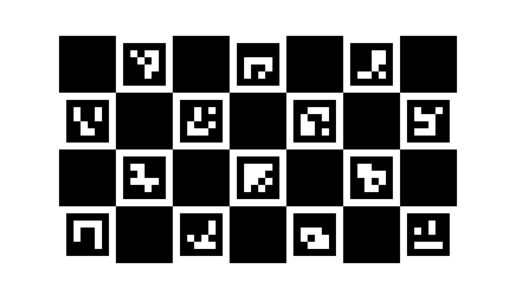

In [5]:
img_charuco = board.generateImage(screen_resolution, marginSize=100, borderBits=1)
plt.imshow(img_charuco, cmap='gray')
plt.axis('off')

# Save the image. We use this image to capture this with fish-eye camera.
file_name = 'charuco_'
file_name += f'{screen_diagonal_inches:.1f}_inch_'
file_name += f'{square_num_x}x{square_num_y}_'
file_name += f'{real_square_size_m*1000:.2f}_mm'
print(file_name)
cv2.imwrite(f'{folder_path_output}/{file_name}.png', img_charuco)